In [2]:
import geopandas as gpd

In [3]:
from shapely.geometry import Point, Polygon
import pandas as pd

## first part, EU

In [5]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
my_map = gpd.read_file('eu.kml', driver='KML')
my_map

,Name,Description,geometry
0,"Directions from Mo i Rana to Marseille, France",,"LINESTRING Z (14.14222 66.31375 0.00000, 14.14..."


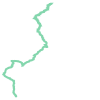

In [6]:
a = my_map.geometry[0]
a

In [124]:

from geopy.distance import geodesic
gdf = gpd.GeoDataFrame(columns=['id', 'geometry','dis','ac_dis','lon','lat'])
for i,co in enumerate(a.coords):
    gdf.loc[i, 'geometry'] = Point(co)
    gdf.loc[i, 'id'] = i
    gdf.loc[i, 'lat'] = gdf.geometry[i].coords[0][1]
    gdf.loc[i, 'lon'] = gdf.geometry[i].coords[0][0]
    if i == 0:
        gdf.loc[i, 'dis'] = 0
        gdf.loc[i, 'ac_dis'] = 0

    else:
        _dis = geodesic((gdf.geometry[i].coords[0][1],gdf.geometry[i].coords[0][0]),(gdf.geometry[i-1].coords[0][1],gdf.geometry[i-1].coords[0][0]))  # lat-long
        gdf.loc[i, 'dis'] = _dis.km
        gdf.loc[i, 'ac_dis'] = gdf.loc[i, 'dis'] + gdf.loc[i-1, 'ac_dis']



In [125]:
gdf

,id,geometry,dis,ac_dis,lon,lat
0,0,POINT Z (14.14222 66.31375 0.00000),0,0,14.14222,66.31375
1,1,POINT Z (14.14227 66.31373 0.00000),0.003163,0.003163,14.14227,66.31373
2,2,POINT Z (14.14509 66.31366 0.00000),0.126707,0.12987,14.14509,66.31366
3,3,POINT Z (14.14499 66.31354 0.00000),0.014113,0.143983,14.14499,66.31354
4,4,POINT Z (14.14467 66.31297 0.00000),0.065162,0.209145,14.14467,66.31297
...,...,...,...,...,...,...
14995,14995,POINT Z (5.37054 43.29771 0.00000),0.017077,3888.498521,5.37054,43.29771
14996,14996,POINT Z (5.37094 43.29777 0.00000),0.033136,3888.531657,5.37094,43.29777
14997,14997,POINT Z (5.37151 43.29776 0.00000),0.046267,3888.577924,5.37151,43.29776
14998,14998,POINT Z (5.37180 43.29628 0.00000),0.166101,3888.744025,5.3718,43.29628


In [126]:
import datetime
avg_speed_eu = 26.455
gdf['date']=pd.to_datetime("1959-02-22 09:00:00")+pd.to_timedelta(gdf['ac_dis']/avg_speed_eu,unit='h')

In [127]:
gdf

,id,geometry,dis,ac_dis,lon,lat,date
0,0,POINT Z (14.14222 66.31375 0.00000),0,0,14.14222,66.31375,1959-02-22 09:00:00.000000000
1,1,POINT Z (14.14227 66.31373 0.00000),0.003163,0.003163,14.14227,66.31373,1959-02-22 09:00:00.430365600
2,2,POINT Z (14.14509 66.31366 0.00000),0.126707,0.12987,14.14509,66.31366,1959-02-22 09:00:17.672709600
3,3,POINT Z (14.14499 66.31354 0.00000),0.014113,0.143983,14.14499,66.31354,1959-02-22 09:00:19.593198000
4,4,POINT Z (14.14467 66.31297 0.00000),0.065162,0.209145,14.14467,66.31297,1959-02-22 09:00:28.460426400
...,...,...,...,...,...,...,...
14995,14995,POINT Z (5.37054 43.29771 0.00000),0.017077,3888.498521,5.37054,43.29771,1959-02-28 11:59:07.407942000
14996,14996,POINT Z (5.37094 43.29777 0.00000),0.033136,3888.531657,5.37094,43.29777,1959-02-28 11:59:11.917075200
14997,14997,POINT Z (5.37151 43.29776 0.00000),0.046267,3888.577924,5.37151,43.29776,1959-02-28 11:59:18.213043200
14998,14998,POINT Z (5.37180 43.29628 0.00000),0.166101,3888.744025,5.3718,43.29628,1959-02-28 11:59:40.816129200


In [128]:
new_gdf = gdf.resample('1h', on='date').first()

In [129]:
new_gdf.to_csv(r'eu_timeseries.csv') 

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [35]:
gdf.loc[gdf['date'] == 0]

,id,geometry,dis,ac_dis,hours
0,0,POINT Z (14.14222 66.31375 0.00000),0,0,0.0


## second part: africa

In [8]:
my_map_af = gpd.read_file('af.kml', driver='KML')
my_map_af.geometry[0]
b = my_map_af.geometry[0]

In [149]:
b = my_map_af.geometry[0]
gdf_af = gpd.GeoDataFrame(columns=['id', 'geometry','dis','ac_dis','lon','lat'])
for i,co in enumerate(b.coords):
    gdf_af.loc[i, 'geometry'] = Point(co)
    gdf_af.loc[i, 'id'] = i
    gdf_af.loc[i, 'lat'] = gdf_af.geometry[i].coords[0][1]
    gdf_af.loc[i, 'lon'] = gdf_af.geometry[i].coords[0][0]
    if i == 0:
        gdf_af.loc[i, 'dis'] = 0
        gdf_af.loc[i, 'ac_dis'] = 0

    else:
        _dis = geodesic((gdf_af.geometry[i].coords[0][1],gdf_af.geometry[i].coords[0][0]),(gdf_af.geometry[i-1].coords[0][1],gdf_af.geometry[i-1].coords[0][0]))  # lat-long
        gdf_af.loc[i, 'dis'] = _dis.km
        gdf_af.loc[i, 'ac_dis'] = gdf_af.loc[i, 'dis'] + gdf_af.loc[i-1, 'ac_dis']

In [150]:
gdf_af

,id,geometry,dis,ac_dis,lon,lat
0,0,POINT Z (3.05796 36.69980 0.00000),0,0,3.05796,36.6998
1,1,POINT Z (3.05811 36.69948 0.00000),0.037957,0.037957,3.05811,36.69948
2,2,POINT Z (3.05903 36.69895 0.00000),0.101084,0.139041,3.05903,36.69895
3,3,POINT Z (3.05912 36.69881 0.00000),0.017494,0.156535,3.05912,36.69881
4,4,POINT Z (3.05911 36.69873 0.00000),0.008923,0.165458,3.05911,36.69873
...,...,...,...,...,...,...
14995,14995,POINT Z (10.23312 -0.70102 0.00000),0.035933,5944.276577,10.23312,-0.70102
14996,14996,POINT Z (10.23407 -0.70117 0.00000),0.107039,5944.383615,10.23407,-0.70117
14997,14997,POINT Z (10.23694 -0.70064 0.00000),0.324794,5944.708409,10.23694,-0.70064
14998,14998,POINT Z (10.23725 -0.70064 0.00000),0.034506,5944.742916,10.23725,-0.70064


In [154]:
avg_speed_af = 10.267702
gdf_af['date']=pd.to_datetime("1959-03-03 09:00:00")+pd.to_timedelta(gdf_af['ac_dis']/avg_speed_af,unit='h')
new_gdf_af = gdf_af.resample('1h', on='date').first()

In [155]:
new_gdf_af

,id,geometry,dis,ac_dis,lon,lat,date
date,,,,,,,
1959-03-03 09:00:00,0.0,POINT Z (3.05796 36.69980 0.00000),0.000000,0.000000,3.05796,36.69980,1959-03-03 09:00:00.000000000
1959-03-03 10:00:00,72.0,POINT Z (3.00756 36.64787 0.00000),3.331466,13.403946,3.00756,36.64787,1959-03-03 10:18:19.611154800
1959-03-03 11:00:00,93.0,POINT Z (2.93862 36.62145 0.00000),0.173525,20.541720,2.93862,36.62145,1959-03-03 11:00:02.214478800
1959-03-03 12:00:00,111.0,POINT Z (2.86987 36.53256 0.00000),4.623680,32.760988,2.86987,36.53256,1959-03-03 12:11:26.460801600
1959-03-03 13:00:00,135.0,POINT Z (2.78799 36.50456 0.00000),0.265021,41.248844,2.78799,36.50456,1959-03-03 13:01:02.422001999
...,...,...,...,...,...,...,...
1959-03-27 08:00:00,14726.0,POINT Z (10.28748 -0.46898 0.00000),0.386798,5904.076171,10.28748,-0.46898,1959-03-27 08:00:51.722830800
1959-03-27 09:00:00,14781.0,POINT Z (10.24341 -0.51224 0.00000),0.521126,5914.623866,10.24341,-0.51224,1959-03-27 09:02:29.892436800
1959-03-27 10:00:00,14865.0,POINT Z (10.22548 -0.55987 0.00000),0.222686,5924.484223,10.22548,-0.55987,1959-03-27 10:00:07.071372000


In [156]:
new_gdf_af.to_csv(r'af_timeseries.csv') 

NameError: name 'gdf' is not defined

## PLOT the track

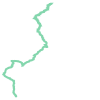

In [9]:
a

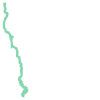

In [10]:
b

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [15]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [25]:
import folium
base = world.explore()
my_map.explore(m=base,color='red')
my_map_af.explore(m=base,color='red')
folium.TileLayer('Stamen Toner', control=True).add_to(base)  # use folium to add alternative tiles
folium.LayerControl().add_to(base)  # use folium to add layer control
base

In [2]:
147+579

726